# Credit Card Fraud Detection

**Import the Data Set**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive (1).zip to archive (1).zip


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/creditcard.csv')  # Update the path as necessary


**Structure of the Dataset**

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107046 entries, 0 to 107045
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    107046 non-null  int64  
 1   V1      107046 non-null  float64
 2   V2      107046 non-null  float64
 3   V3      107046 non-null  float64
 4   V4      107046 non-null  float64
 5   V5      107046 non-null  float64
 6   V6      107046 non-null  float64
 7   V7      107046 non-null  float64
 8   V8      107046 non-null  float64
 9   V9      107046 non-null  float64
 10  V10     107046 non-null  float64
 11  V11     107046 non-null  float64
 12  V12     107046 non-null  float64
 13  V13     107046 non-null  float64
 14  V14     107046 non-null  float64
 15  V15     107046 non-null  float64
 16  V16     107046 non-null  float64
 17  V17     107046 non-null  float64
 18  V18     107046 non-null  float64
 19  V19     107046 non-null  float64
 20  V20     107046 non-null  float64
 21  V21     10

In [ ]:
# Summary statistics
data_description = data.describe()
print(data_description)



                Time             V1             V2             V3  \
count  107046.000000  107046.000000  107046.000000  107046.000000   
mean    44163.193393      -0.257831      -0.026560       0.682250   
std     17718.024713       1.853150       1.647586       1.317292   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     34238.000000      -1.023275      -0.595414       0.176950   
50%     46023.000000      -0.260775       0.078063       0.757881   
75%     58413.750000       1.154981       0.738193       1.383324   
max     70256.000000       1.960497      18.902453       4.226108   

                  V4             V5             V6             V7  \
count  107046.000000  107046.000000  107046.000000  107046.000000   
mean        0.157009      -0.283548       0.098077      -0.116249   
std         1.344114       1.348799       1.299593       1.208427   
min        -5.172595     -42.147898     -26.160506     -31.764946   
25%        -0.712661      -0.9065

In [ ]:
# Correlation matrix
data_correlation = data.corr()
print(data_correlation)


            Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000 -0.007037 -0.045773 -0.026119 -0.027491 -0.042627 -0.003357   
V1     -0.007037  1.000000  0.054036  0.219512 -0.064185  0.019726  0.062842   
V2     -0.045773  0.054036  1.000000 -0.082705  0.044837 -0.041357  0.017592   
V3     -0.026119  0.219512 -0.082705  1.000000 -0.088773  0.197279 -0.068438   
V4     -0.027491 -0.064185  0.044837 -0.088773  1.000000 -0.004926 -0.042274   
V5     -0.042627  0.019726 -0.041357  0.197279 -0.004926  1.000000  0.039040   
V6     -0.003357  0.062842  0.017592 -0.068438 -0.042274  0.039040  1.000000   
V7     -0.004720  0.078772 -0.027561  0.191893 -0.019039 -0.041945  0.056809   
V8      0.018707 -0.006280  0.008730 -0.123673  0.041728 -0.020237 -0.045189   
V9     -0.242081 -0.055625 -0.007020  0.118340  0.042796  0.037281  0.042766   
V10     0.064061  0.016078  0.009443  0.117792 -0.094034  0.076828 -0.011109   
V11    -0.173526 -0.002582  0.032430 -0.

In [ ]:
# Filter the dataset to only include fraudulent transactions
fraudulent_count = data[data['Class'] == 1]


In [ ]:
# Filter the dataset for fraudulent transactions
fraudulent_data = data[data['Class'] == 1]

#  summary statistics for fraudulent transactions
fraudulent_stats = fraudulent_data['Amount'].describe()
print("Summary Statistics for Fraudulent Transactions:")
print(fraudulent_stats)


Summary Statistics for Fraudulent Transactions:
count     235.000000
mean      115.033362
std       252.411933
min         0.000000
25%         1.000000
50%         7.580000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64


In [ ]:
# Checking how many fraudulent transactions there are
fraudulent_count = data['Class'].value_counts()
print(f'Number of Legitimate Transactions: {fraudulent_count[0]}')
print(f'Number of Fraudulent Transactions: {fraudulent_count[1]}')


Number of Legitimate Transactions: 106810
Number of Fraudulent Transactions: 235


In [ ]:
# Convert 'Time' column to 24-hour format as a string in a new column
fraudulent_data = fraudulent_data.copy()  # Create a copy
fraudulent_data['Time_24hr'] = pd.to_datetime(fraudulent_data['Time'], unit='s').dt.strftime('%H:%M:%S')

# Convert 'Time' to minutes
fraudulent_data['Time_in_minutes'] = fraudulent_data['Time'] / 60  # Retain minutes for plotting



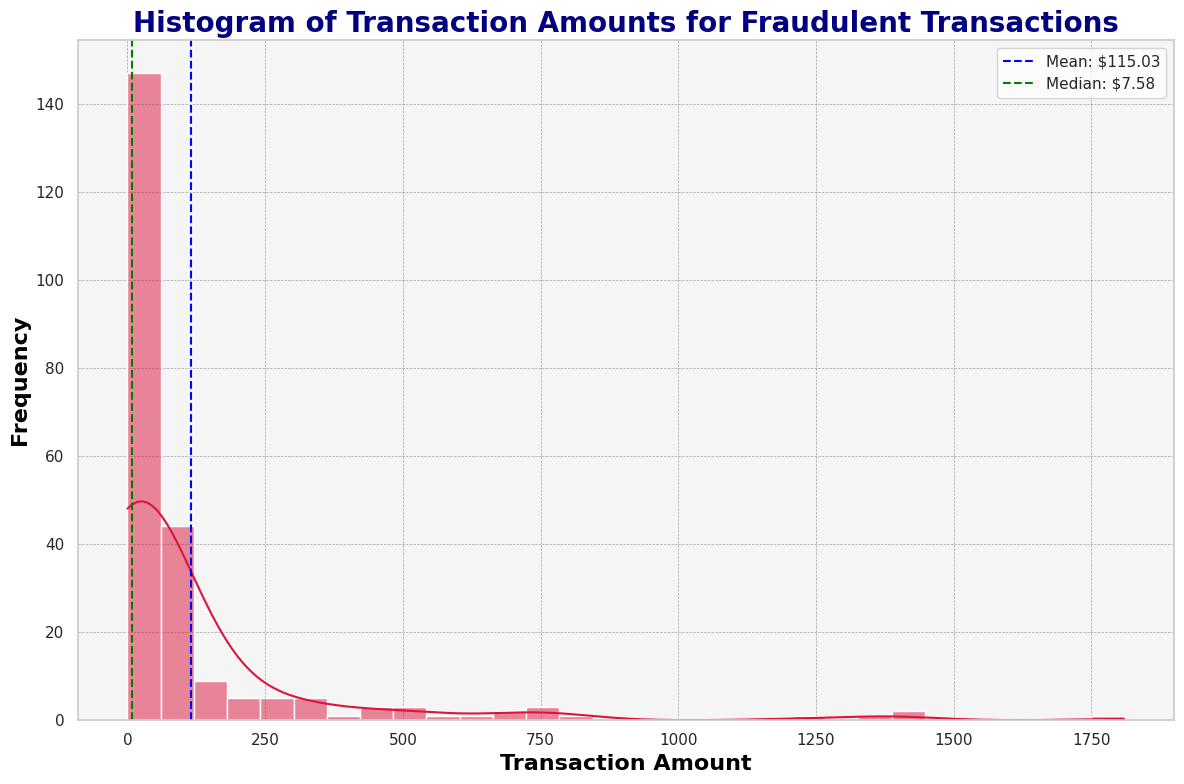

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style='whitegrid')

# Creating the histogram
plt.figure(figsize=(12, 8))
sns.histplot(fraudulent_data['Amount'], bins=30, color='crimson', kde=True)
mean_amount = fraudulent_data['Amount'].mean()
median_amount = fraudulent_data['Amount'].median()
plt.axvline(mean_amount, color='blue', linestyle='--', label=f'Mean: ${mean_amount:.2f}')
plt.axvline(median_amount, color='green', linestyle='--', label=f'Median: ${median_amount:.2f}')
plt.title('Histogram of Transaction Amounts for Fraudulent Transactions', fontsize=20, fontweight='bold', color='navy')
plt.xlabel('Transaction Amount', fontsize=16, fontweight='bold', color='black')
plt.ylabel('Frequency', fontsize=16, fontweight='bold', color='black')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().set_facecolor('whitesmoke')
plt.tight_layout()
plt.show()







*Observation: Most fraudulent transactions are relatively small, with 75% under 105.89. This pattern suggests that fraudsters may opt for smaller amounts to avoid detection. However, there is a broad range in amounts, from $0 up to 2,125.87, showing that while larger fraud attempts are less frequent, they do occur.*


In [ ]:
# Convert Time from seconds to 24-hour clock format (HH:MM:SS)
fraudulent_data['Time_24hr'] = pd.to_datetime(fraudulent_data['Time'], unit='s').dt.strftime('%H:%M:%S')


In [ ]:
# Creating hour Column
# Converting tie to hours
data['Hour'] = (data['Time'] // 3600) % 24  # Get the hour in a 24-hour format

# Filter for fraudulent transactions
fraudulent_data = data[data['Class'] == 1]

#  Count fraudulent transactions by hour
hourly_counts = fraudulent_data['Hour'].value_counts().sort_index()

#  hour with the highest and lowest number of transactions
highest_hour = hourly_counts.idxmax()
highest_count = hourly_counts.max()
lowest_hour = hourly_counts.idxmin()
lowest_count = hourly_counts.min()

print(f"The hour with the most fraudulent transactions is {highest_hour}:00 with {highest_count} transactions.")
print(f"The hour with the least fraudulent transactions is {lowest_hour}:00 with {lowest_count} transactions.")


The hour with the most fraudulent transactions is 11:00 with 43 transactions.
The hour with the least fraudulent transactions is 0:00 with 2 transactions.


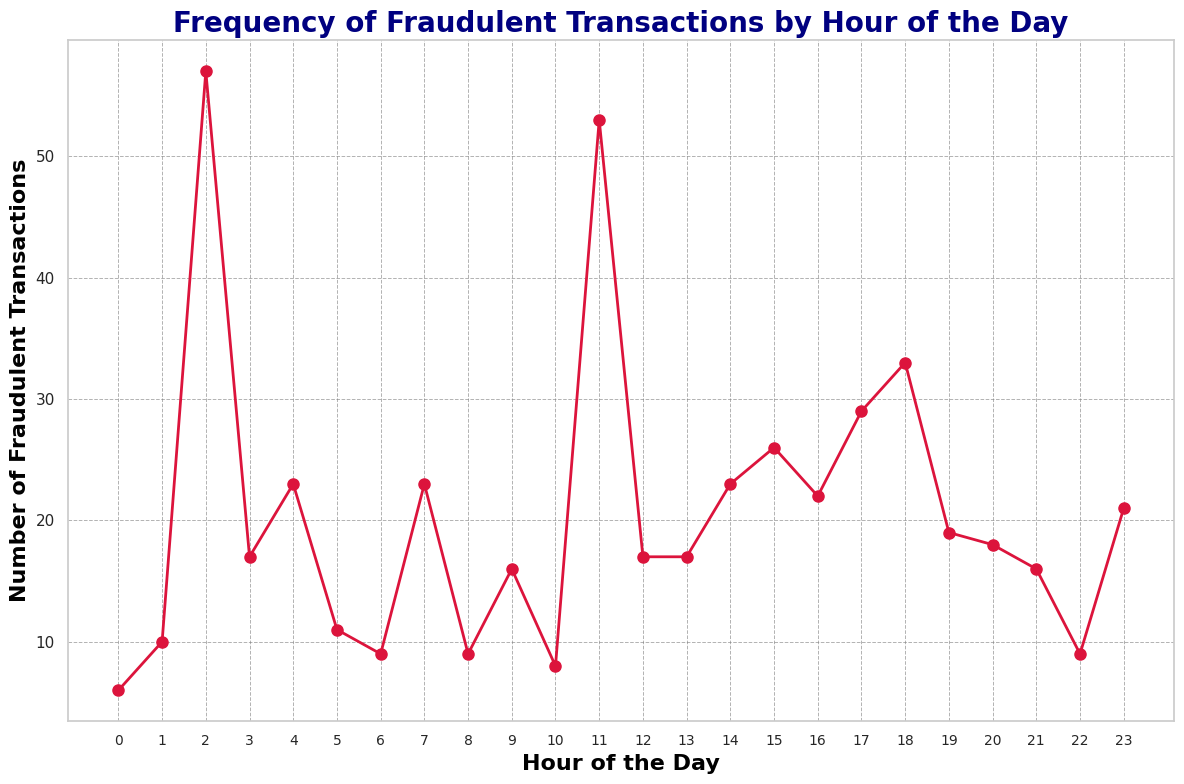

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
hourly_fraud_counts = fraudulent_data[fraudulent_data['Class'] == 1]['Hour'].value_counts().sort_index()
plt.figure(figsize=(12, 8), facecolor='white')
plt.plot(hourly_fraud_counts.index, hourly_fraud_counts.values, marker='o', color='crimson', linewidth=2, markersize=8)
plt.title('Frequency of Fraudulent Transactions by Hour of the Day', fontsize=20, fontweight='bold', color='navy')
plt.xlabel('Hour of the Day', fontsize=16, fontweight='bold', color='black')
plt.ylabel('Number of Fraudulent Transactions', fontsize=16, fontweight='bold', color='black')
plt.grid(color='gray', linestyle='--', linewidth=0.7, alpha=0.6)
plt.xticks(hourly_fraud_counts.index, fontsize=10)
plt.tight_layout()
plt.show()


*Observations:
Fraudulent activity peaks in the early morning hours, suggesting fraudsters may take advantage of lower oversight during this time.
Midnight has the least activity, indicating a potential preference for times when fewer transactions occur.*

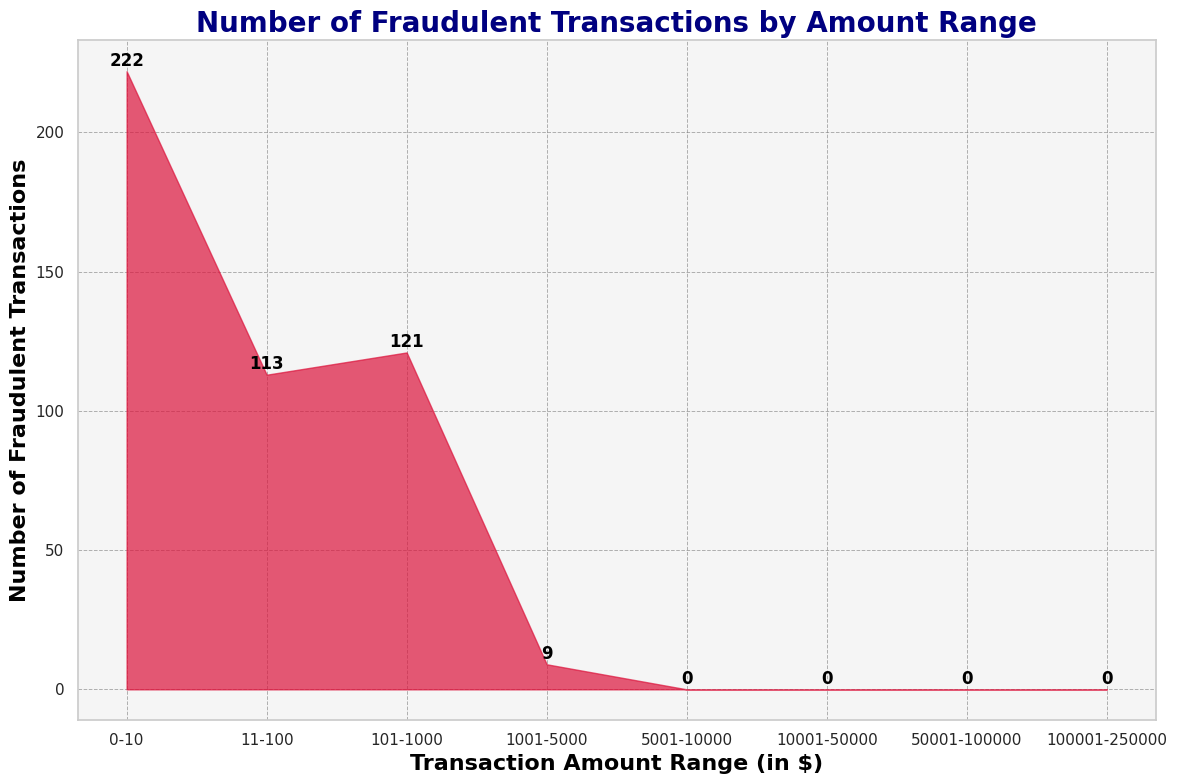

In [ ]:
# Area Plot for fraudulent transactions by amount range
plt.figure(figsize=(12, 8), facecolor='white')

# Creating an area plot
plt.fill_between(amount_range_counts.index, amount_range_counts.values, color='crimson', alpha=0.7)
for i, value in enumerate(amount_range_counts.values):
    plt.text(i, value + 2, str(value), ha='center', fontsize=12, fontweight='bold', color='black')
plt.title('Number of Fraudulent Transactions by Amount Range', fontsize=20, fontweight='bold', color='navy')
plt.xlabel('Transaction Amount Range (in $)', fontsize=16, fontweight='bold', color='black')
plt.ylabel('Number of Fraudulent Transactions', fontsize=16, fontweight='bold', color='black')
plt.grid(color='gray', linestyle='--', linewidth=0.7, alpha=0.6)
plt.gca().set_facecolor('whitesmoke')
plt.tight_layout()
plt.show()


Missing values before handling:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       1
Amount    1
Class     1
Hour      0
dtype: int64
Missing values after handling:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
Hour      0
dtype: int64


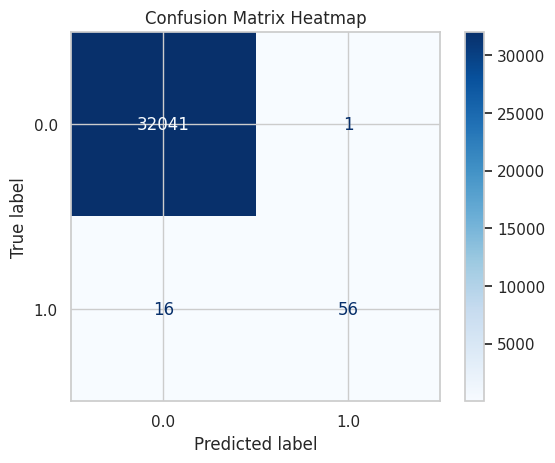

In [ ]:
 Check for missing values in the dataset
print("Missing values before handling:")
print(data.isnull().sum())
drop rows with any NaN values)
data = data.dropna()
# Verify that there are no missing values left
print("Missing values after handling:")
print(data.isnull().sum())
# splitting and modeling
X = data.drop(columns=['Class'])  # Features
y = data['Class']                 # Target
# Train-test split and model training as before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plot_confusion_matrix_heatmap(y_test, y_pred)

